# Introdução



# Objetivos

- Verificar o comportamento da representação de sinais a partir da transformada de Fourier;
- Certificar a influência das características do sinal no domínio do tempo e frequência;
- Avaliar a energia do sinal.

# Bibliotecas utilizadas no codigo

In [1]:
# Packages install
%pip install numpy control matplotlib scipy sympy numba

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Análise numérica
import numpy as np
import scipy as sci
# Análise analitica
import sympy as sym
# Plots
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
# Tipagem
from typing import List, Tuple
# Desabilitar warnings (somente para exportação)
# import warnings
# warnings.filterwarnings('ignore')

# Considerando o sinal x(t) definido como:
$$
x(t) = 
  \begin{cases}
    1 - |t|\text{;} & \quad \frac{-1}{2} \leqslant t \leqslant \frac{1}{2} \\
    \text{0; } & \quad \text{ otherwise} \\
  \end{cases}
$$

## Esboce o sinal x(t) no intervalo $-2 \leqslant t \leqslant 2$

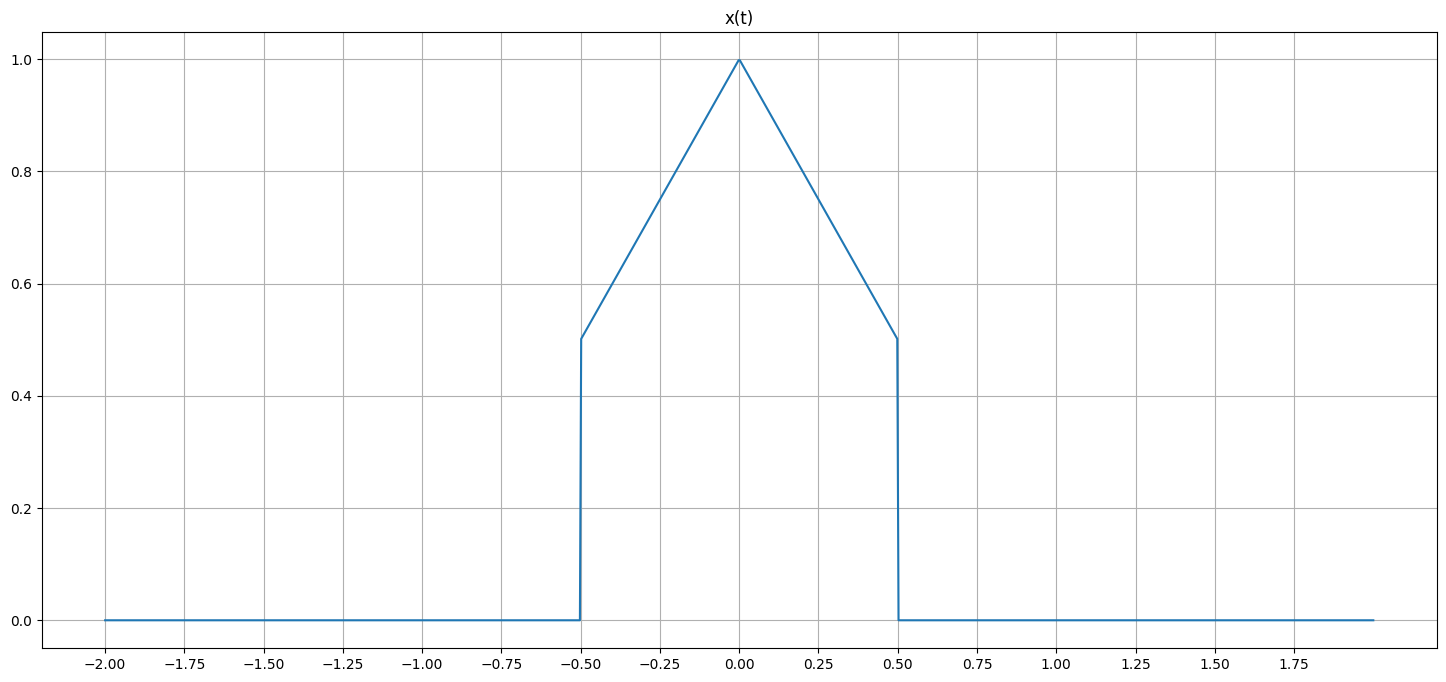

In [3]:
# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))


t = np.linspace(-2, 2, 1000)

fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max(), 0.5/2))
ax.grid(visible=True)


## Use a diferenciação temporal e outras propriedades da transformada de Fourier para determinar X(ω). 
A única integração que você deve usar é determinar o componente DC X(0).


### Usando a propiedade linear da transformada


$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então o sinal pode ser desconstruido em:

$$pulso(-0.5, 0.5) + (0.5 -|t|)$$

$$x1(t) = (0.5 -|t|)$$

$$x2(t) = pulso(-0.5, 0.5)$$


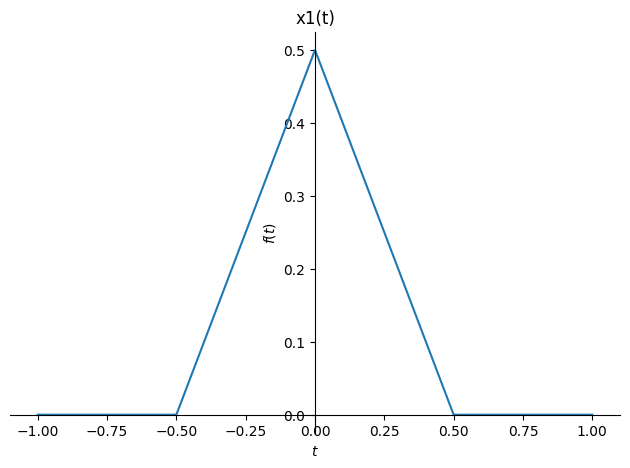

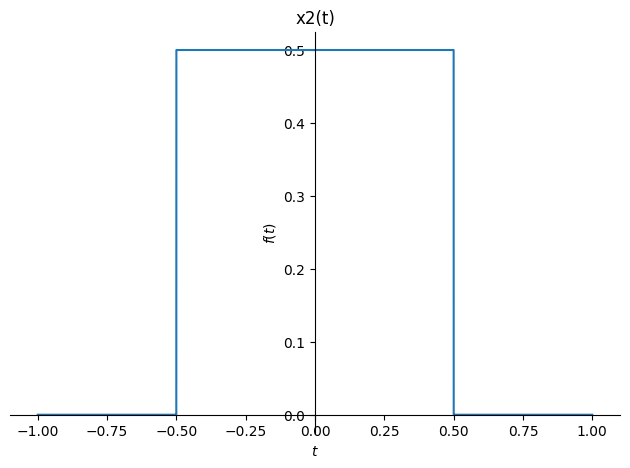

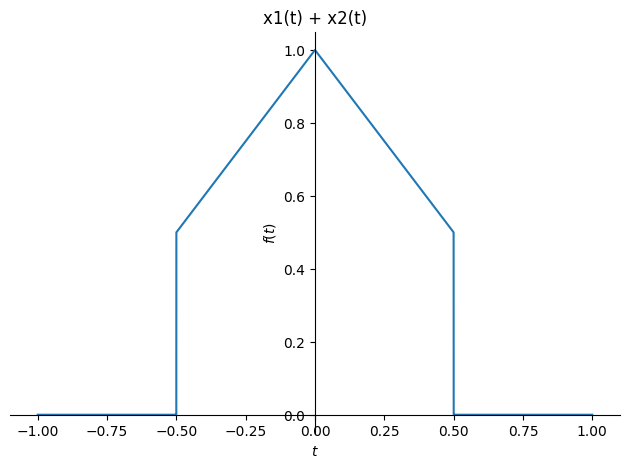

In [4]:
def abs_sym(x):
    return sym.sqrt(sym.Pow(x, 2))

t = sym.Symbol('t')
# Definindo x1(t)
x1_t = (0.5 - abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))

x2_t = 0.5 * (sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))

sym.plot(x1_t, (t, -1, 1), title="x1(t)")
sym.plot(x2_t, (t, -1, 1), title="x2(t)")
sym.plot(x1_t + x2_t, (t, -1, 1), title="x1(t) + x2(t)")



### Calculando X1(w)

#### Usando a diferenciação temporal

Usando a propiedade da diferenciação temporal:
$$-jwX(w) = \frac{dx}{dt}$$
e
$$-w^2X(w) = \frac{d^2x}{d^2t}$$

então:

Para calcular a transformada de Fourier desse pulso, vamos diferenciá-lo várias vezes. Primeiro, obtemos a primeira derivada, dx/dt, que é uma função constante. No entanto, dx/dt apresenta descontinuidades em t = 1/2 e t = -1/2, onde ocorrem saltos positivos de 1 e saltos negativos de -1, respectivamente tem uma descontinuidade adicional em t = 0, onde ocorre um salto negativo de -2. É importante lembrar que a derivada de um sinal em um ponto de descontinuidade resulta em um impulso nesse ponto, com uma força igual ao valor absoluto do salto. Portanto, a segunda derivada, d2x/dt2, será uma sequência de impulsos.

Na figura a seguir tem o esboço das derivadas

então usando a propiedade da deferenciação temporal

$$ -w²X1(w) = \delta(t - \frac{1}{2}) -2\delta(t) + \delta(t + \frac{1}{2}) $$

logo

$$ X1(w) = \frac{\delta(t - \frac{1}{2}) -2\delta(t) + \delta(t + \frac{1}{2})}{-w^2}$$

fazendo a transformada dos deltas

Obs: $\delta(t - t_0) = e^{-jwt_0}$

$$ X1(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2}$$

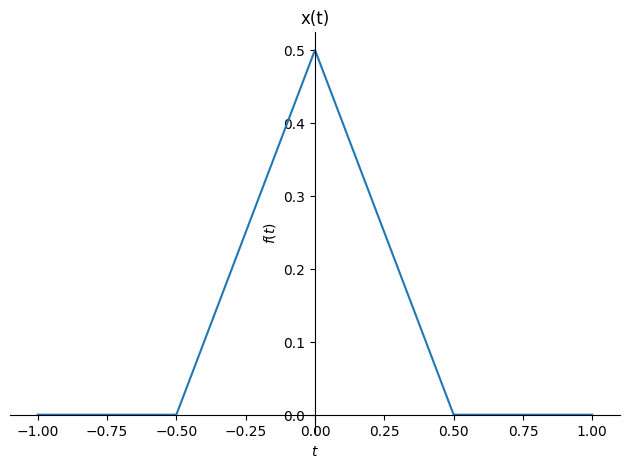

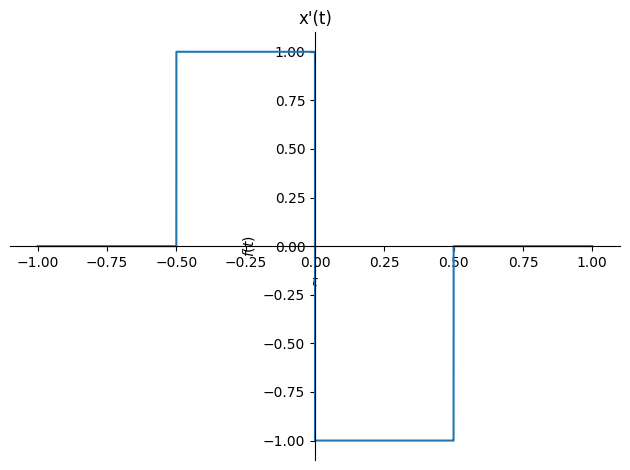

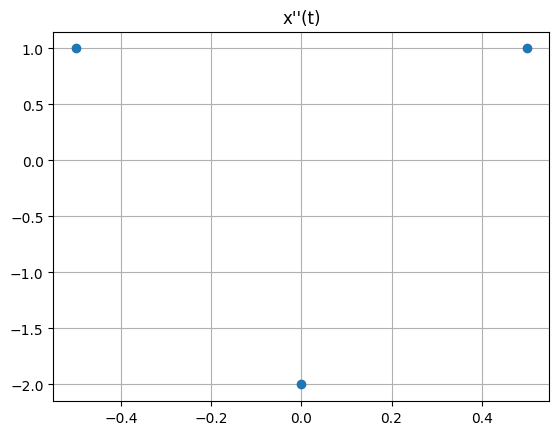

In [5]:
def abs_sym(x):
    return sym.sqrt(x**2)

t = sym.Symbol('t')

# Definindo x1(t)
x1_t = (0.5 - abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))
# Derivando x1(t)
dx1_t = sym.diff(x1_t)
# Segunda derivada de x1(t)
ddx1_t = sym.diff(dx1_t)


sym.plot(x1_t, (t, -1, 1), title="x(t)")

sym.plot(dx1_t, (t, -1, 1), title="x'(t)")

plt.plot([0.5, -0.5, 0], [1, 1, -2], "o", )
plt.title('x\'\'(t)')
plt.grid()

#### Verificando a transformada de X1(w)

/home/alejopm/eng/SIS/sinais-e-sistemas/T2/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


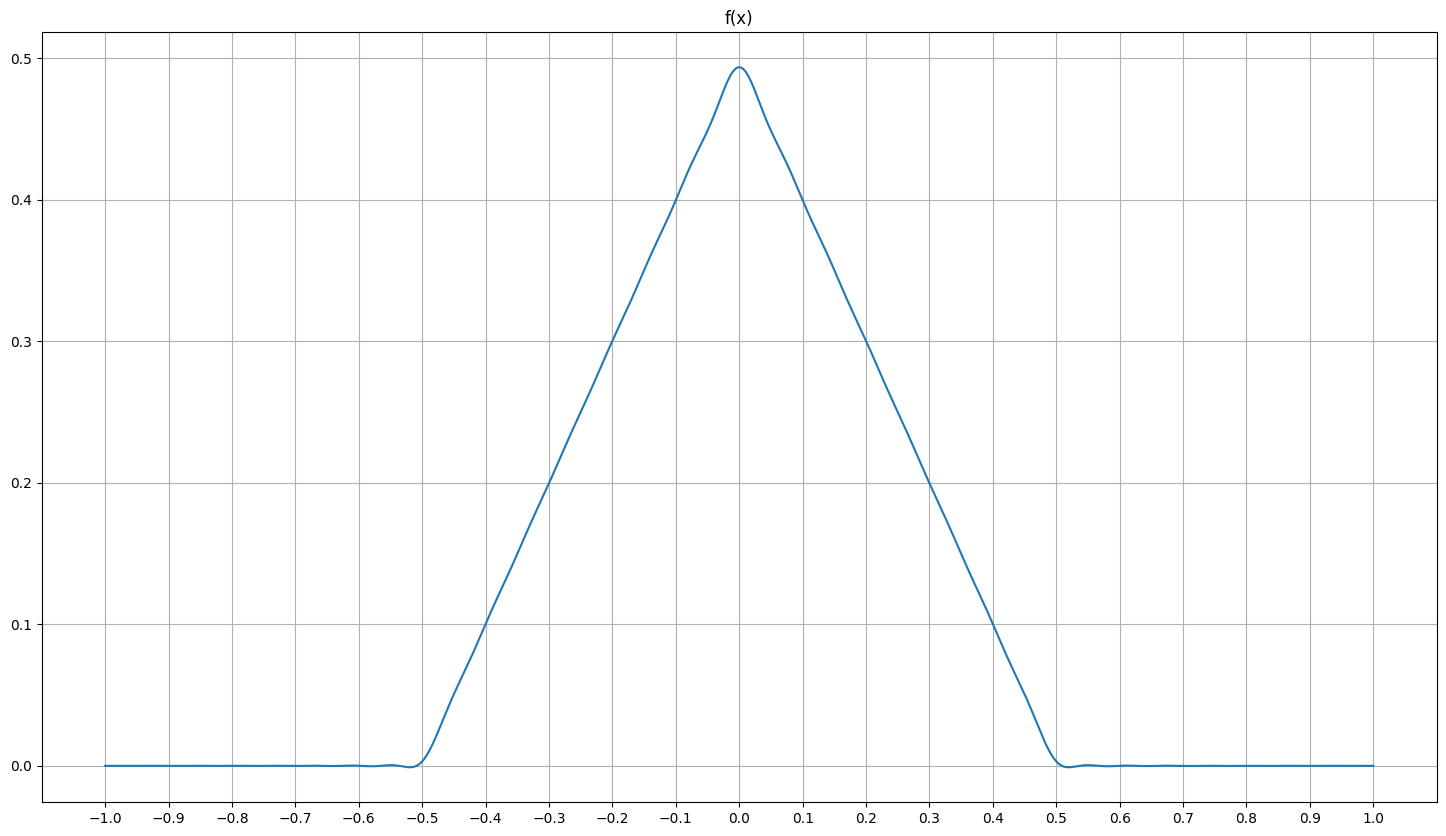

In [6]:
def x_w(w):
    return ((np.exp(1j * (w / 2))) + -2 + (np.exp(-1j * (w / 2)))) / (-(w)**2)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

# limites do grafico
x_min = -1
x_max = 1
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-100, 100, 1000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t))

# Show the plot
plt.show()

### Calculando X2(w)

#### Usando a diferenciação temporal

Usando a propiedade da diferenciação temporal:
$$-jwX(w) = \frac{dx}{dt}$$

então:

Para calcular a transformada de Fourier de uma função retangular (rect), vamos diferenciá-la uma vez. A função retangular é constante e possui duas descontinuidades em -1/2 e 1/2, cada uma com uma altura de 1/2. De acordo com a propriedade de que a derivada de um sinal em um ponto de descontinuidade resulta em um impulso nesse ponto, com uma força igual ao valor absoluto do salto, a primeira derivada será uma sequência de impulsos.

Usando a propiedade da diferenciação temporal:

$$ -jwX2(w) = \frac{1}{2}\delta(t - \frac{1}{2}) - \frac{1}{2}\delta(t + \frac{1}{2}) $$

fazendo a transformada dos deltas

Obs: $\delta(t - t_0) = e^{-jwt_0}$

$$ X2(w) = \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$


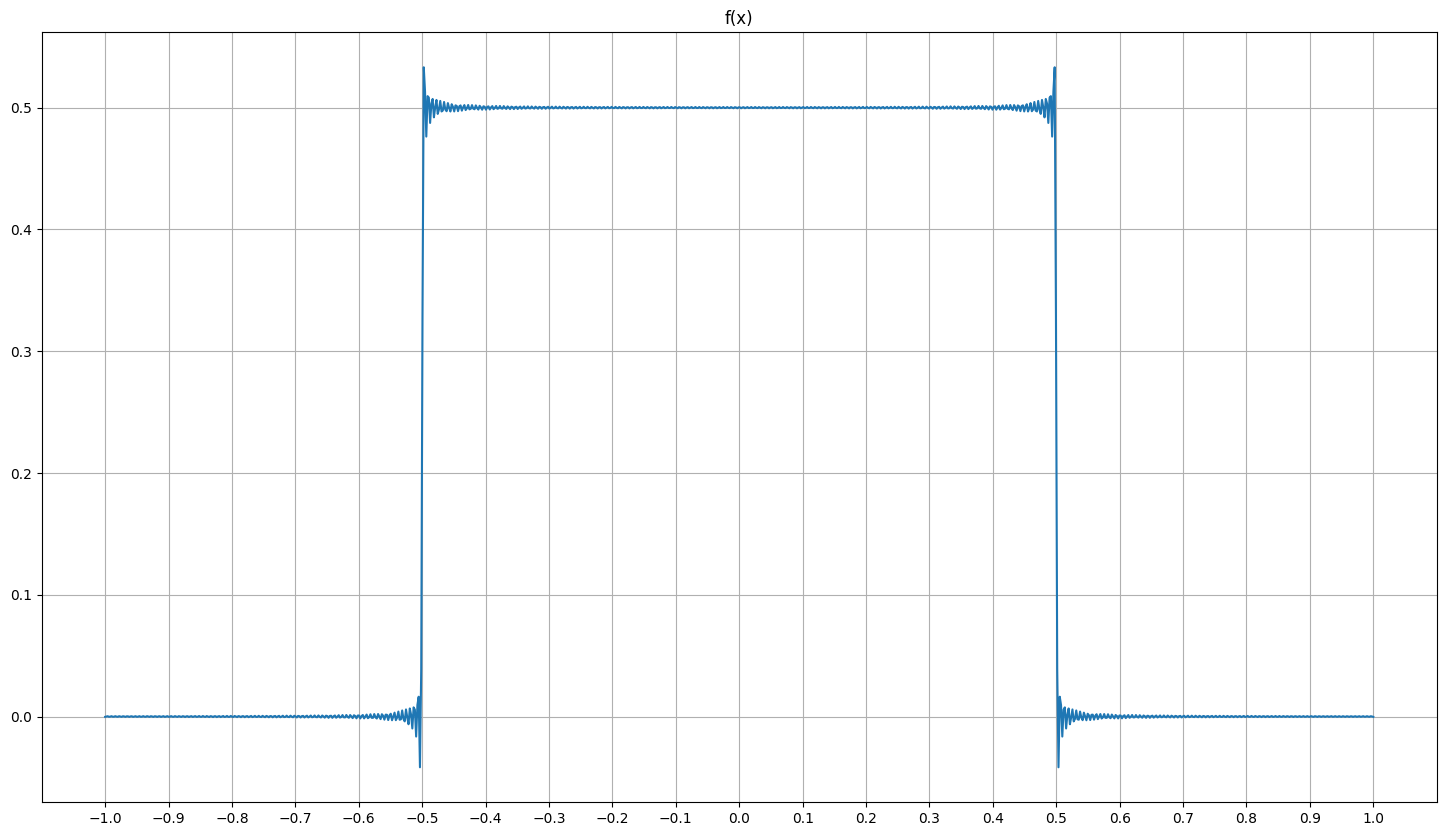

In [7]:
def x_w(w):
    return ((np.exp(1j * (w / 2)) / 2) - (np.exp(-1j * (w / 2))) /2) / (1j * w)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

# limites do grafico
x_min = -1
x_max = 1
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-1000, 1000, 1000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t))

# Show the plot
plt.show()

### Calculando X(w)

Usando a propiedade linear 
$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então:

$$X(w) = X1(w) + X2(w)$$

$$ X1(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2}$$

$$ X2(w) = \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$

$$ X(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2} + \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$

In [8]:
w = sym.Symbol('w')

X1_w = (sym.exp(sym.I * w / 2) - 2 + sym.exp(-sym.I * w / 2)) / (-(w**2))
X2_w = ((sym.exp(sym.I * w / 2) / 2) - (sym.exp(-sym.I * w / 2) / 2)) / -(sym.I * w)

X_w = X1_w + X2_w

display(sym.simplify(X_w))

(-I*w*(1 - exp(I*w)) + 2*(2 - exp(I*w/2))*exp(I*w/2) - 2)*exp(-I*w/2)/(2*w**2)

## Usando um programa computacional, verifique a exatidão de X(ω) sintetizando a partir da reprodução de 3 períodos do sinal original no domínio do tempo x(t)

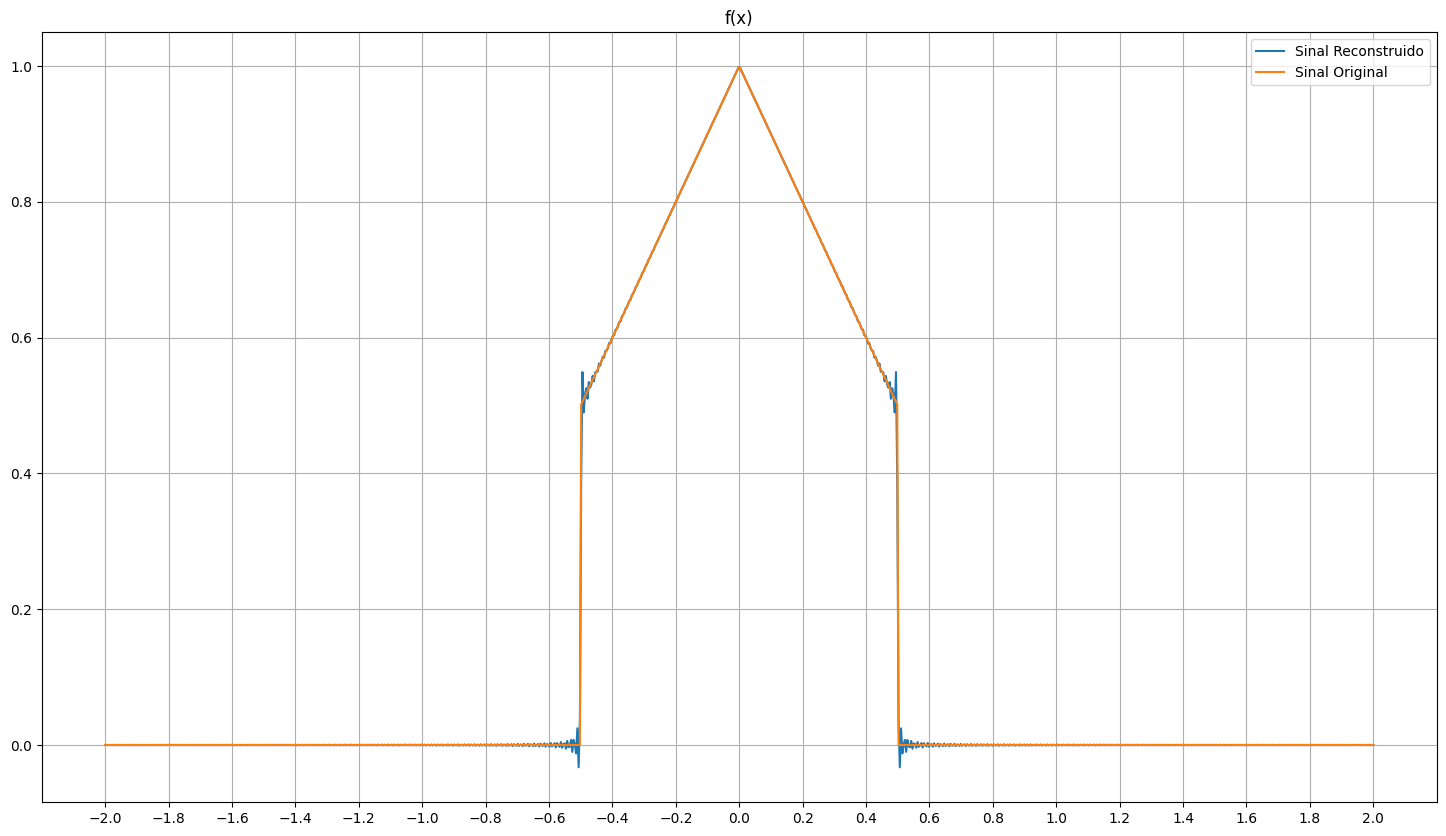

In [9]:
def x1_w(w):
    return ((np.exp(1j * (w / 2))) + -2 + (np.exp(-1j * (w / 2)))) / (-(w)**2)

def x2_w(w):
    return ((np.exp(1j * (w / 2)) / 2) - (np.exp(-1j * (w / 2))) /2) / (1j * w)

def x_w(w):
    return x1_w(w) + x2_w(w)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

def x_t(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))

# limites do grafico
x_min = -2
x_max = 2
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-600, 600, 10000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t), label="Sinal Reconstruido")
ax.plot(t, x_t(t), label="Sinal Original")

ax.legend()
# Show the plot
plt.show()

# Considere o sinal:
$$x(t) = |t|rect (\frac{t − 1}{3})$$

## Esboce o sinal x(t) no intervalo −5 ≤ t ≤ 5

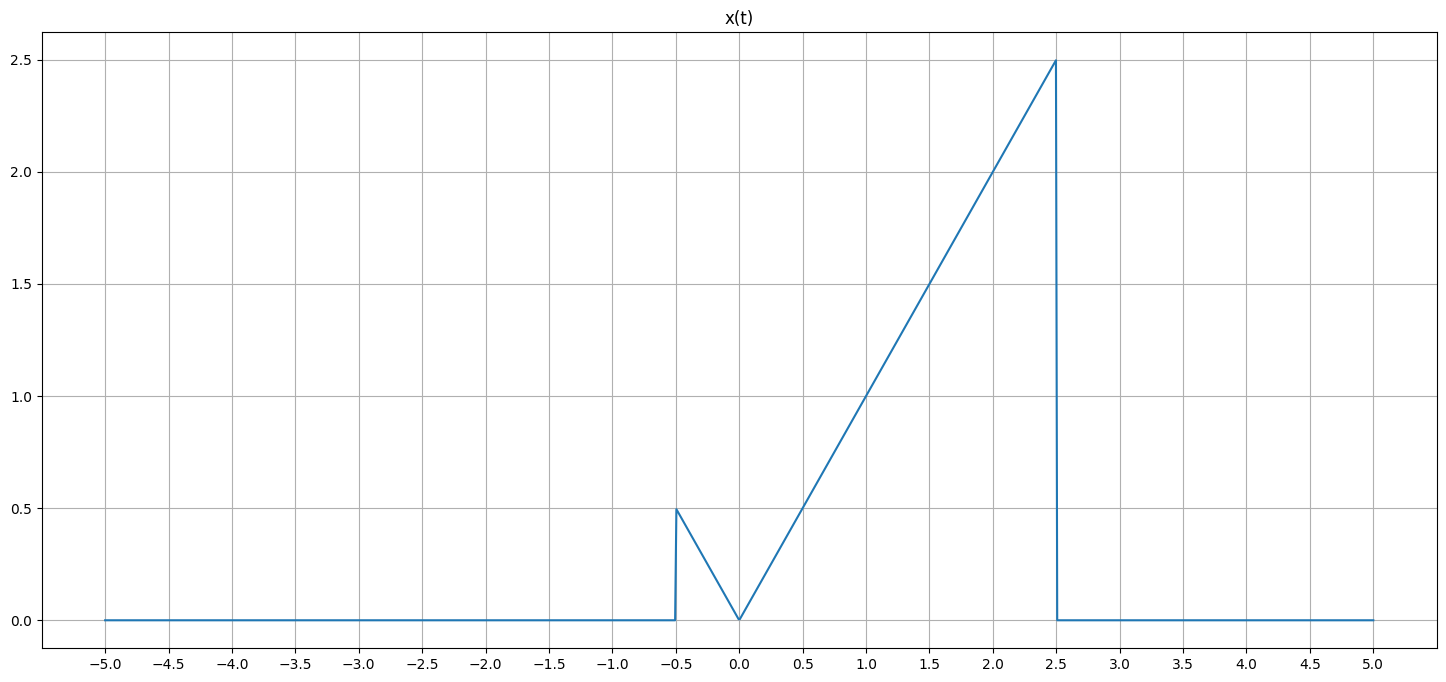

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return (np.abs(t) * pulse(t, -0.5, 2.5))

# Definir o intervalo de tempo
t = np.linspace(-5, 5, 1000)

# Plotar o sinal x(t)
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max() + 0.001, t.max()/10))
ax.grid(visible=True)

### Usando a propiedade linear da transformada


$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então o sinal pode ser desconstruido em:

$$
x(t) =
  \begin{cases}
    t & \quad \text{if }  \frac{1}{2} <= x <= 0 \\
    -t & \quad \text{ if }  0 <= x <= \frac{5}{2} \\
  \end{cases}
$$

logo a transformada vai ser 

$$
  X(w) = \int_{\frac{-1}{2}}^{0} -t * e^{-j*w*t} + 
    \int_{0}^{\frac{-5}{2}} t * e^{-j*w*t}
$$

resolvendo a integral

$$
\begin{cases} 
  \frac{\left(- 0.5 i w e^{3.0 i w} + 2.5 i w - 2.0 e^{2.5 i w} + 1.0 e^{3.0 i w} + 1.0\right) e^{- 2.5 i w}}{w^{2}} & 
  \text{for}\: w \neq 0 \\\frac{13}{4} & \text{otherwise} 
\end{cases}
$$



In [58]:
def abs_sym(x):
    return sym.Abs(x)

t = sym.Symbol('t')
# Definindo x(t)
x_t = abs_sym(t)

# Calculando a transformada de fourier
w = sym.Symbol('w')
x_w1 = sym.integrate(-t * sym.exp(-1j * w * t), (t, -sym.Rational(1,2), 0))
x_w2 = sym.integrate(t * sym.exp(-1j * w * t), (t, 0, sym.Rational(5,2)))
x_w = x_w1 +  x_w2

# Simplificando o resultado
x_w = sym.simplify(x_w).rewrite(sym.exp).simplify().trigsimp()
display(x_w)
print(sym.latex(x_w))

x_w = sym.lambdify(w, x_w)

Piecewise(((-0.5*I*w*exp(3.0*I*w) + 2.5*I*w - 2.0*exp(2.5*I*w) + 1.0*exp(3.0*I*w) + 1.0)*exp(-2.5*I*w)/w**2, Ne(w, 0)), (13/4, True))

\begin{cases} \frac{\left(- 0.5 i w e^{3.0 i w} + 2.5 i w - 2.0 e^{2.5 i w} + 1.0 e^{3.0 i w} + 1.0\right) e^{- 2.5 i w}}{w^{2}} & \text{for}\: w \neq 0 \\\frac{13}{4} & \text{otherwise} \end{cases}


/home/alejopm/eng/SIS/sinais-e-sistemas/T2/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


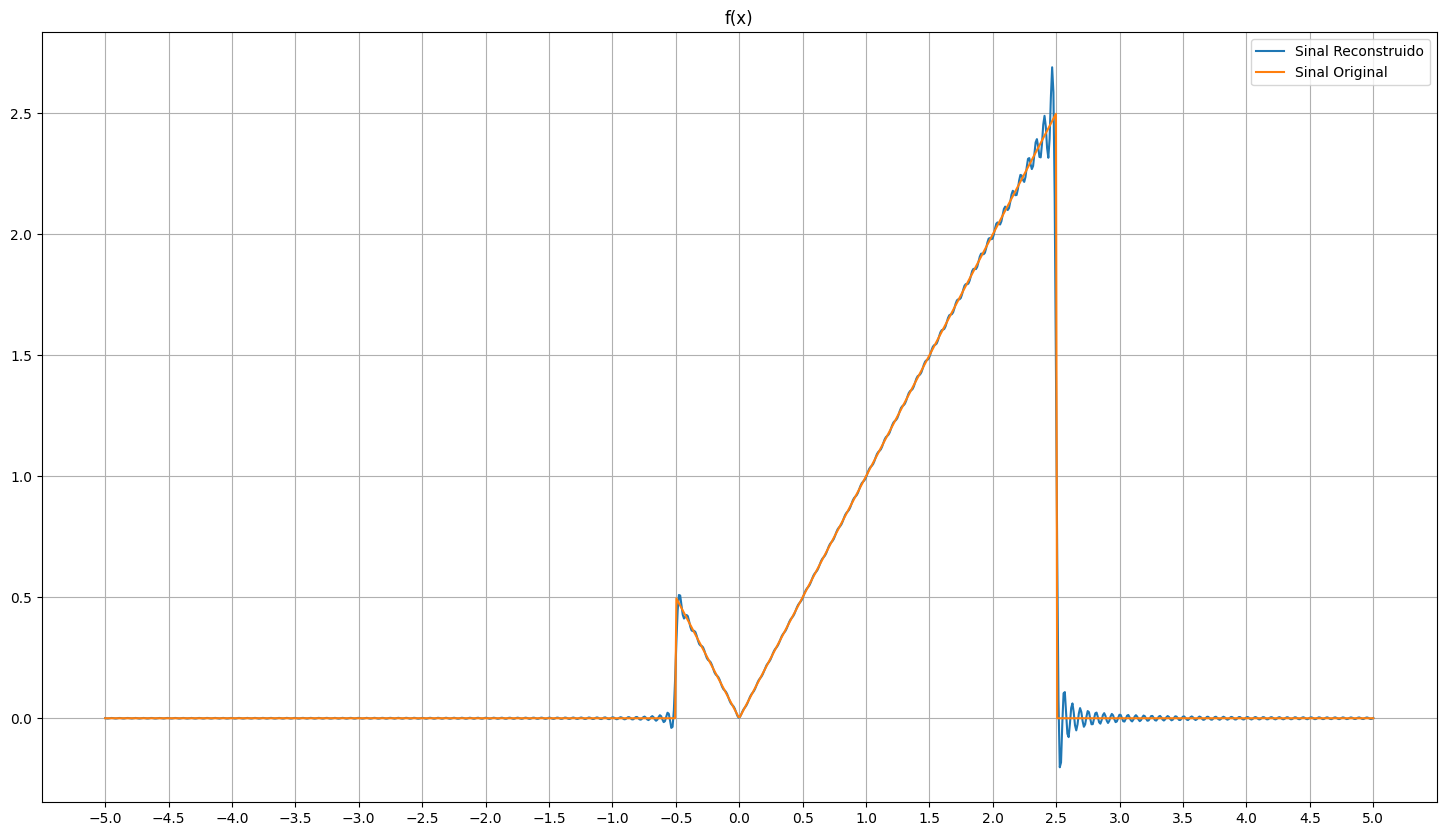

In [62]:
# Faz a transformada inversa de x_w
def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

def x_t(t):
    return (np.abs(t) * pulse(t, -0.5, 2.5))
 
# limites do grafico
x_min = -5
x_max = 5
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-100, 100, 10000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t), label="Sinal Reconstruido")
ax.plot(t, x_t(t), label="Sinal Original")

ax.legend()
# Show the plot
plt.show()

In [ ]:
# JIT utils for speed
from numba import float64, jit

#
# Section 7, Program 2 port Python
#

def MS7P2(signal, tau: float, beta: float, tol: float) -> Tuple[float, float]:
	"""
	Calculates the essential bandwidth W of a signal.

	Inputs:
		- signal = signal to be analyzed
		- tau = pulse width
		- beta = fraction of the signal energy desired in W
		- tol = relative energy error tolerance

	Outputs:
		- W = essential bandwidth [rad/s]
		- E_W = Energy contained in the bandwidth W
	"""
	
	# Desired energy in W
	E = beta * tau

	# Initial relative error as 100% and E_W as 0
	E_W = 0
	relative_error = (E - 0) / E

	# Initial guess and step values
	W = 0
	step = 2.0 * np.pi / tau

	# Perturb W until the relative error is within the tolerance
	while np.abs(relative_error) > tol:
		# If W is too small
		if relative_error > 0:
			# Increase W by step
			W = W + step
		# If W is too large
		elif relative_error < 0:
			# Decrease step and then W
			step = step / 2.0
			W = W - step
		E_W = (sci.integrate.quad(signal, -W, W, args=(tau,))[0]) / (2 * np.pi)
		relative_error = (E - E_W) / E

	return (W, E_W)


# Define SINC function as MS7P1 from book
@jit(float64(float64), nopython = True, cache = True)
def MS7P1(x):
	return (np.sin(x) / x) if x != 0 else 1


# Define signal analyzed in book
@jit(float64(float64, float64), nopython = True, cache = True)
def x_squared(omega, tau):
	return (np.exp(-)) ** 2

 
# Define input parameters
tau = 1
beta = 0.9
tol = 0.0005


# Compute desired results
(W, E_W) = MS7P2(x_squared, tau, beta, tol)

print("W = ", W)
print("E_W = ", E_W)

Time taken:  0.00036525726318359375
W =  5.3014376029327765
E_W =  0.899707680234536


In [47]:
#
# Modified Section 7, Program 2 port Python
#

#
# Get target energy for a given band percentage
#
def get_E(beta):
	return (beta * np.pi) / 2.0

#
# Get energy for a given W
#
def get_E_W(W, alpha):
	return np.arctan(W / alpha)

#
# Absolute error minimization function
#
def W_energy(W, alpha, beta):
	# Desired energy in W
	E = get_E(beta)

	# Calculates energy in W
	E_W = get_E_W(W, alpha)

	# Calculates relative error
	relative_error = (E - E_W)

	return np.abs(relative_error)

 
# Define input parameters
tol = 0.00000001

#
# Calculates W and E_W for following combinations
#     - (alpha = 1, beta = 0.95)
#     - (alpha = 2, beta = 0.9)
#     - (alpha = 3, beta = 0.75)
#
for i in [
	{ "alpha": 1, "beta": 0.95 },
	{ "alpha": 2, "beta": 0.9 },
	{ "alpha": 3, "beta": 0.75 },
]:
	# Compute desired results

	res = sci.optimize.minimize_scalar(W_energy, args=(i['alpha'], i['beta']), tol = tol)

	print(res.success)
	print(f"Analyzing W and EW for alpha = {i['alpha']} and beta = {i['beta']}")
	print(f"    - W = {res.x}")
	print(f"    - E_W = {get_E_W(res.x, i['alpha'])}")


True
Analyzing W and EW for alpha = 1 and beta = 0.95
    - W = 12.706204711367974
    - E_W = 1.4922565103024459
True
Analyzing W and EW for alpha = 2 and beta = 0.9
    - W = 12.62750308185892
    - E_W = 1.4137166947578983
True
Analyzing W and EW for alpha = 3 and beta = 0.75
    - W = 7.242640720109697
    - E_W = 1.178097246706617
